In [2]:
%reload_ext autoreload
%autoreload 2

In [7]:
from ripple_heterogeneity.utils import (
    functions,
    loading,
    batch_analysis,
    add_new_deep_sup,
)
from scipy import stats

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nelpy as nel
# import nelpy.plotting as npl
from matplotlib.ticker import AutoMinorLocator
import os
from scipy import stats
from statannot import add_stat_annotation
from scipy.ndimage import gaussian_filter1d
import warnings
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle
from track_linearization import make_track_graph
from track_linearization import get_linearized_position
from ripple_heterogeneity.utils import linearization_pipeline


functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

In [4]:
with open(r"Z:\Data\AYAold\AB3\AB3_42_46\linearization_nodes_edges.pkl", "rb") as f:
    result = pickle.load(f)
result

{'node_positions': array([[ 29.80779762,  73.30322096],
        [166.06586213,  76.4825758 ],
        [156.98199116, 130.53160806],
        [ 29.35360407, 122.81031774],
        [163.34070084,  18.79999516],
        [ 32.98715245,  20.1625758 ]]),
 'edges': [[0, 1], [1, 2], [2, 3], [3, 0], [1, 4], [4, 5], [5, 0]]}

In [9]:
basepath = r"Z:\Data\AYAold\AB3\AB3_42_46"
epochs = linearization_pipeline.load_epoch(basepath)
behave_df = linearization_pipeline.load_animal_behavior(basepath)
epoch = 1
cur_epoch = (
    ~np.isnan(behave_df.x) &
    (behave_df.time >= epochs.iloc[epoch].startTime) &
    (behave_df.time <= epochs.iloc[epoch].stopTime)
)

node_positions = result['node_positions']
edges = result['edges']

track_graph = make_track_graph(node_positions, edges)

position = np.vstack(
    [behave_df[cur_epoch].x.values, behave_df[cur_epoch].y.values]
).T

position_df = get_linearized_position(
    position=position,
    track_graph=track_graph,
    edge_order=edges,
    use_HMM=True,
)

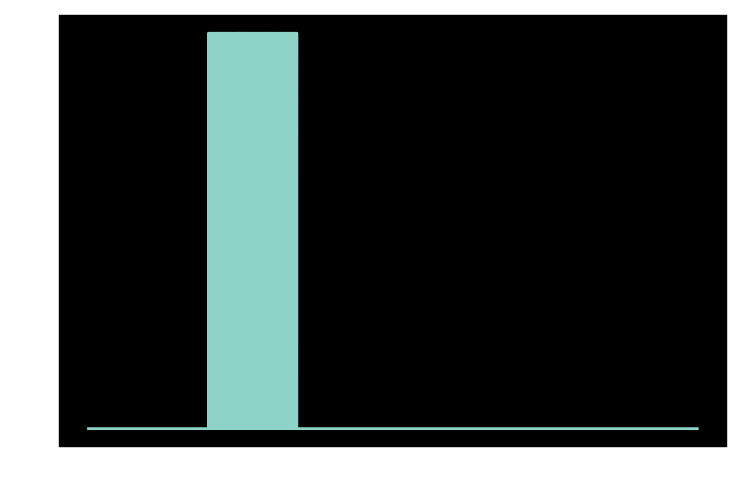

In [12]:
plt.plot(cur_epoch)

In [16]:
cur_epoch

0         False
1         False
2         False
3         False
4         False
          ...  
285532    False
285533    False
285534    False
285535    False
285536    False
Length: 285537, dtype: bool

<AxesSubplot:xlabel='x', ylabel='y'>

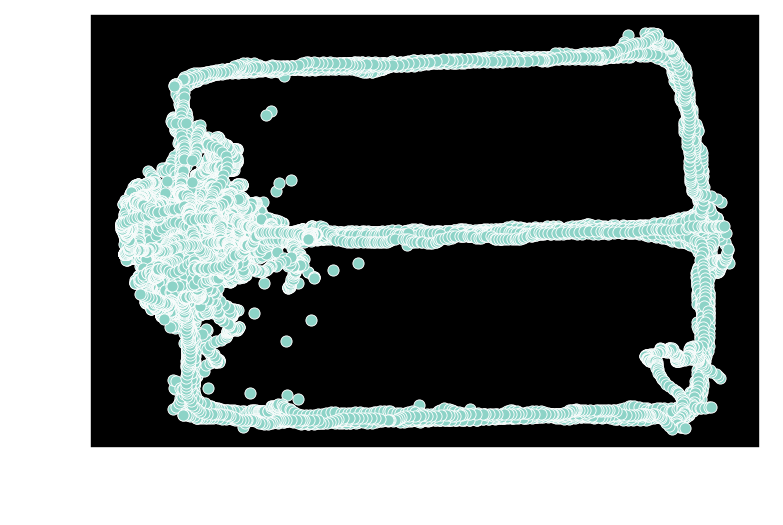

In [15]:
sns.scatterplot(data=behave_df[cur_epoch],x="x",y="y")

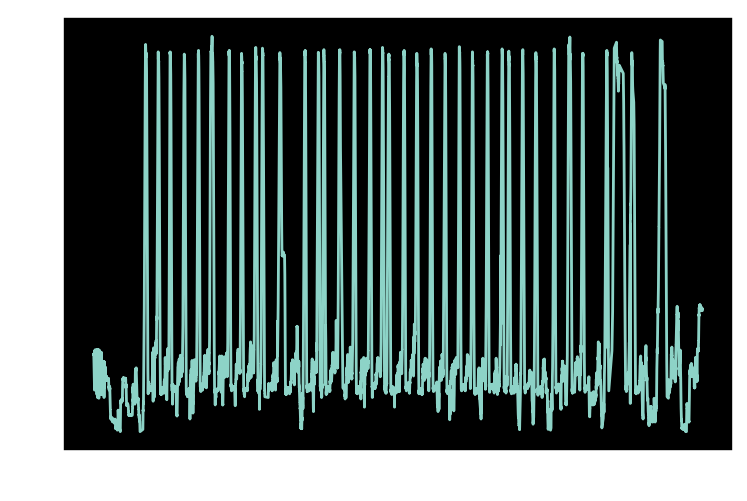

In [17]:
plt.plot(behave_df[cur_epoch].x)

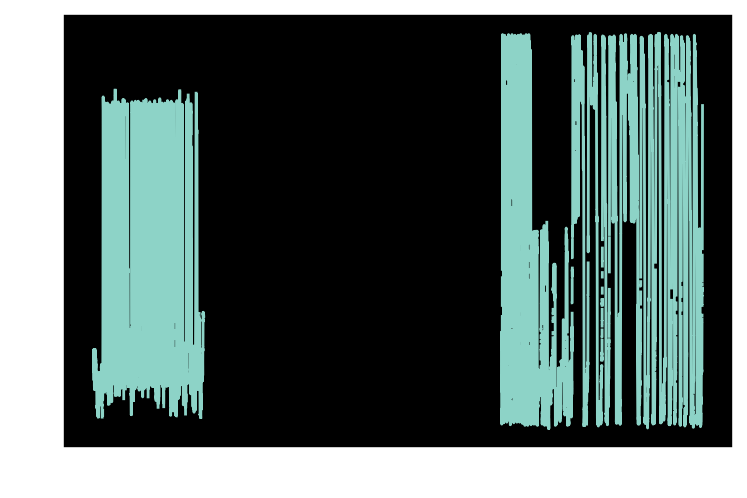

In [18]:
plt.plot(behave_df.x)


In [26]:
behave_df.loc[cur_epoch, "linearized"] = position_df.linear_position.values
behave_df.loc[cur_epoch, "track_segment_id"] = position_df.track_segment_id.values
behave_df.loc[cur_epoch, "projected_x_position"] = position_df.projected_x_position.values
behave_df.loc[cur_epoch, "projected_y_position"] = position_df.projected_y_position.values

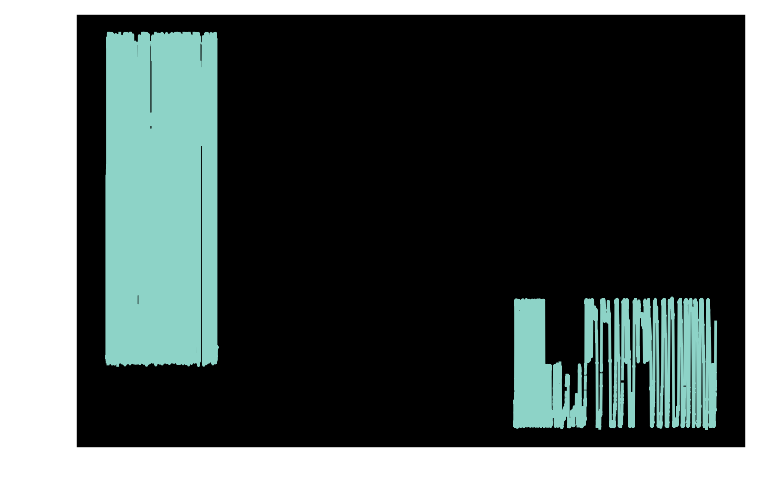

In [27]:
plt.plot(behave_df.linearized)


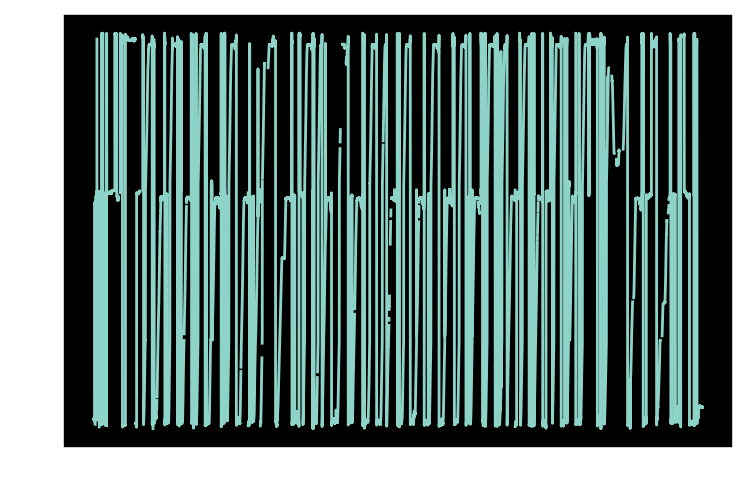

In [25]:
plt.plot(behave_df.linear_position.values)

In [23]:
import glob
from scipy.io import savemat, loadmat

filename = glob.glob(os.path.join(basepath, "*.animal.behavior.mat"))[0]
data = loadmat(filename, simplify_cells=True)
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Oct 28 17:48:29 2022',
 '__version__': '1.0',
 '__globals__': [],
 'behavior': {'sr': 39.0625,
  'position': {'x': array([nan, nan, nan, ..., nan, nan, nan]),
   'y': array([nan, nan, nan, ..., nan, nan, nan]),
   'z': array([], dtype=uint8),
   'linearized': array([nan, nan, nan, ..., nan, nan, nan]),
   'units': 'cm',
   'projected_x': array([nan, nan, nan, ..., nan, nan, nan]),
   'projected_y': array([nan, nan, nan, ..., nan, nan, nan])},
  'speed': array([nan, nan, nan, ..., nan, nan, nan]),
  'acceleration': array([  0.     ,       nan,       nan, ...,  19.53125, -19.53125,
         -19.53125]),
  'trials': array([[   0.    , 1443.968 ],
         [1443.968 , 1448.2944],
         [1448.2944, 1452.3392],
         [1452.3392, 1456.    ],
         [1456.    , 1456.2048],
         [1456.2048, 1456.256 ],
         [1456.256 , 1456.64  ],
         [1456.64  , 1458.7392],
         [1458.7392, 1464.7552],
         [1

In [16]:
from ripple_heterogeneity.utils import loading
import numpy as np
basepath = r"Z:\Data\ORproject\OR15\day1"

behave_df = loading.load_animal_behavior(basepath)
na_idx = np.isnan(behave_df[["x", "y"]]).any(axis=1)

# track_graph = make_track_graph(self.node_positions, self.edges)

position = np.vstack(behave_df[["x", "y"]].values)[~na_idx,:].T
position

array([[ 67.1741,  66.9263,  66.7164, ...,  40.1268,  39.9583,  39.8309],
       [112.6325, 112.8155, 113.0069, ..., 126.1248, 126.383 , 126.6282]])

here is the file, Z:\Data\ORproject\OR15\day1


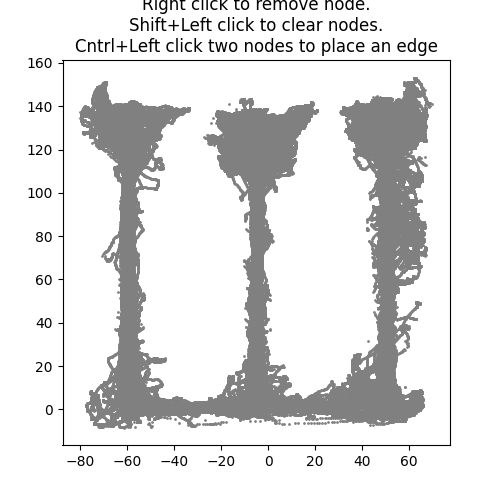

In [9]:
%matplotlib widget
from ripple_heterogeneity.utils import linearization_pipeline
basepath = r"Z:\Data\ORproject\OR15\day1"
picker = linearization_pipeline.run(basepath)

In [57]:
picker

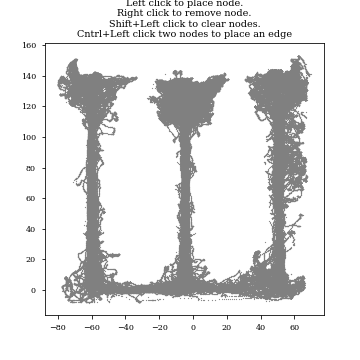

In [27]:
%matplotlib widget

plt.ion()

class NodePicker():
    """Interactive creation of track graph by looking at video frames."""

    def __init__(self, ax=None, video_filename=None, node_color="r", node_size=100):
        if ax is None:
            ax = plt.gca()
        self.ax = ax
        self.canvas = ax.get_figure().canvas
        self.cid = None
        self._nodes = []
        self.node_color = node_color
        self._nodes_plot = ax.scatter(
            [], [],
            zorder=5, s=node_size, color=node_color)
        self.edges = [[]]
        self.video_filename = video_filename

        # if video_filename is not None:
            # self.video = cv2.VideoCapture(video_filename)
            # frame = self.get_video_frame()
            # ax.imshow(frame, picker=True)
            # behave_df = loading.load_animal_behavior(video_filename)
            # ax.scatter(behave_df.x, behave_df.y)

        ax.set_title('Left click to place node.\nRight click to remove node.'
                        '\nShift+Left click to clear nodes.\nCntrl+Left click two nodes to place an edge')
        self.canvas.draw()

        self.connect()

    @property
    def node_positions(self):
        return np.asarray(self._nodes)

    def connect(self):
        if self.cid is None:
            self.cid = self.canvas.mpl_connect(
                'button_press_event', self.click_event)

    def disconnect(self):
        if self.cid is not None:
            self.canvas.mpl_disconnect(self.cid)
            self.cid = None

    def click_event(self, event):
        if not event.inaxes:
            return
        if (event.key not in ['control', 'shift']) & (event.button == 1):  # left click
            self._nodes.append((event.xdata, event.ydata))
        if (event.key not in ['control', 'shift']) & (event.button == 3):  # right click
            self.remove_point((event.xdata, event.ydata))
        if (event.key == 'shift') & (event.button == 1):
            self.clear()
        if (event.key == 'control') & (event.button == 1):
            point = (event.xdata, event.ydata)
            distance_to_nodes = np.linalg.norm(
                self.node_positions - point, axis=1)
            closest_node_ind = np.argmin(distance_to_nodes)
            if len(self.edges[-1]) < 2:
                self.edges[-1].append(closest_node_ind)
            else:
                self.edges.append([closest_node_ind])
            # print(self.edges)
        if (event.key == 'enter'):
            self.disconnect()

        self.redraw()

    def redraw(self):
        # Draw Node Circles
        if len(self.node_positions) > 0:
            self._nodes_plot.set_offsets(self.node_positions)
        else:
            self._nodes_plot.set_offsets([])

        # Draw Node Numbers
        # self.ax.texts = []
        for ind, (x, y) in enumerate(self.node_positions):
            self.ax.text(x, y, ind,
                         zorder=6,
                         fontsize=12,
                         horizontalalignment='center',
                         verticalalignment='center',
                         clip_on=True,
                         bbox=None,
                         transform=self.ax.transData,
                         )
        # Draw Edges
        # self.ax.lines = []  # clears the existing lines
        for edge in self.edges:
            if len(edge) > 1:
                x1, y1 = self.node_positions[edge[0]]
                x2, y2 = self.node_positions[edge[1]]
                self.ax.plot([x1, x2], [y1, y2],
                            color=self.node_color,
                            linewidth=5, zorder=1000)

        self.canvas.draw_idle()
        # self.canvas.draw()

    def remove_point(self, point):
        if len(self._nodes) > 0:
            distance_to_nodes = np.linalg.norm(
                self.node_positions - point, axis=1)
            closest_node_ind = np.argmin(distance_to_nodes)
            self._nodes.pop(closest_node_ind)

    def clear(self):
        self._nodes = []
        self.edges = [[]]
        self.redraw()


video_filename = r"Z:\Data\ORproject\OR15\day1"
fig, ax = plt.subplots(figsize=(5, 5))

behave_df = loading.load_animal_behavior(video_filename)
nan_idx = np.isnan(behave_df[["x","y"]]).any(axis=1)

ax.scatter(behave_df.x, behave_df.y,color="grey",s=1)

picker = NodePicker(ax=ax, video_filename=video_filename)


In [43]:
functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

(-87.657195, 77.55389500000001, -16.407625000000003, 161.319925)

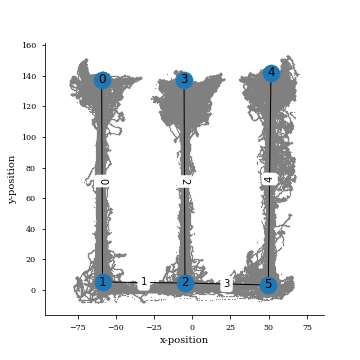

In [28]:
import matplotlib.pyplot as plt
from track_linearization import make_track_graph, plot_track_graph
fig, ax = plt.subplots(figsize=(5, 5))

track_graph = make_track_graph(picker.node_positions, picker.edges)
plot_track_graph(track_graph, ax=ax, draw_edge_labels=True)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.scatter(behave_df.x, behave_df.y, s=1, zorder=-11, color="grey")
plt.axis("equal")

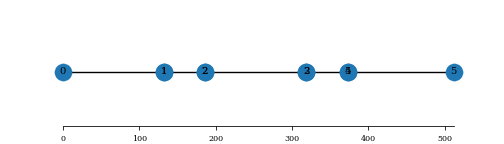

In [29]:
from track_linearization.utils import plot_graph_as_1D

fig, ax = plt.subplots(figsize=(7, 2))
plot_graph_as_1D(track_graph,
                 ax=ax)

In [34]:
from track_linearization import get_linearized_position

position = np.vstack([behave_df.x.values, behave_df.y.values])[:,~nan_idx].T
position_df = get_linearized_position(
    position=position,
    track_graph=track_graph,
    edge_order=picker.edges,
)

(-87.657195, 77.55389500000001, -16.407625000000003, 161.319925)

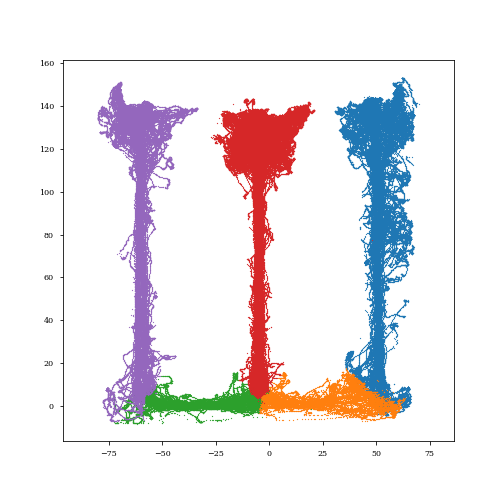

In [35]:
fig, ax = plt.subplots(figsize=(7, 7))

for track_segment_id in position_df.track_segment_id.unique():
    idx = position_df.track_segment_id == track_segment_id
    ax.scatter(position[idx, 0], position[idx, 1], s=1, zorder=2, clip_on=False)
plt.axis("equal")

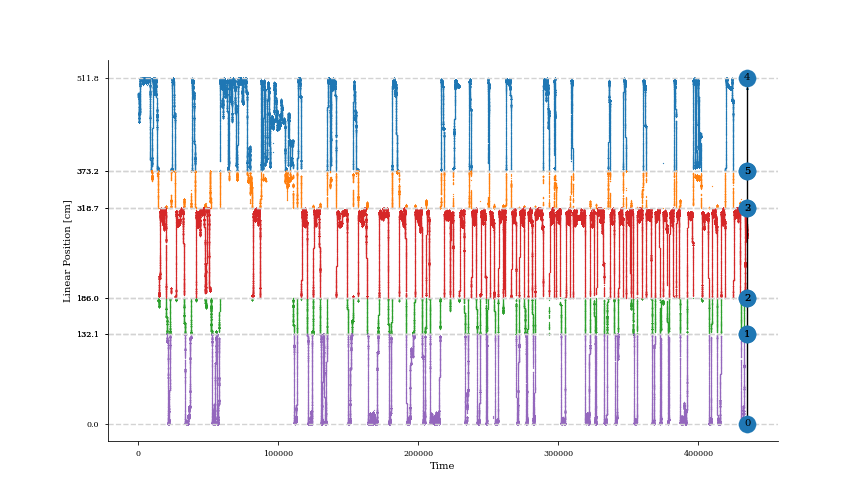

In [36]:
fig, ax = plt.subplots(figsize=(12, 7))
# ax.scatter(position_df.index, position_df.linear_position, s=1, zorder=2, clip_on=False)

for track_segment_id in position_df.track_segment_id.unique():
    idx = position_df.track_segment_id == track_segment_id
    ax.scatter(
        position_df.index[idx],
        position_df.linear_position[idx],
        s=1,
        zorder=2,
        clip_on=False,
    )

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# ax.set_xlim((0, position_df.shape[0]))
ax.set_ylabel("Position")
ax.set_xlabel("Time")
plot_graph_as_1D(
    track_graph,
    edge_order=picker.edges,
    ax=ax,
    axis="y",
    other_axis_start=position_df.index.max() + 1,
)

start_node_linear_position = 0.0
ticks = []

for ind, edge in enumerate(picker.edges):
    end_node_linear_position = (
        start_node_linear_position + track_graph.edges[edge]["distance"]
    )
    ax.axhline(start_node_linear_position, color="lightgrey", linestyle="--")
    ax.axhline(end_node_linear_position, color="lightgrey", linestyle="--")
    ticks.append(start_node_linear_position)
    ticks.append(end_node_linear_position)
    try:
        start_node_linear_position += (
            track_graph.edges[edge]["distance"]
        )
    except IndexError:
        pass
ax.set_yticks(ticks)
plt.show()

In [46]:
position_df

behave_df = loading.load_animal_behavior(video_filename)
nan_idx = np.isnan(behave_df[["x","y"]]).any(axis=1)
behave_df.loc[~nan_idx, "linear_position"] = position_df.linear_position.values
behave_df.loc[~nan_idx, "track_segment_id"] = position_df.track_segment_id.values
behave_df.loc[~nan_idx, "projected_x_position"] = position_df.projected_x_position.values
behave_df.loc[~nan_idx, "projected_y_position"] = position_df.projected_y_position.values
behave_df

,time,x,y,z,linearized,speed,acceleration,epochs,linear_position,track_segment_id,projected_x_position,projected_y_position
0,2.79925,NaN,NaN,19.3239,NaN,5.304503,0.000000,OR15day1_1_180116_095729,NaN,NaN,NaN,NaN
1,2.80755,NaN,NaN,19.3147,NaN,5.142359,-0.162144,OR15day1_1_180116_095729,NaN,NaN,NaN,NaN
2,2.81590,NaN,NaN,19.3118,NaN,4.897786,-0.244573,OR15day1_1_180116_095729,NaN,NaN,NaN,NaN
3,2.82425,NaN,NaN,19.2998,NaN,4.899227,0.001441,OR15day1_1_180116_095729,NaN,NaN,NaN,NaN
4,2.83255,NaN,NaN,19.2957,NaN,4.660540,-0.238687,OR15day1_1_180116_095729,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
455392,9890.38545,NaN,NaN,NaN,NaN,NaN,NaN,OR15day1_2_180116_171020,NaN,NaN,NaN,NaN
455393,9890.39375,NaN,NaN,NaN,NaN,NaN,NaN,OR15day1_2_180116_171020,NaN,NaN,NaN,NaN
455394,9890.40210,NaN,NaN,NaN,NaN,NaN,NaN,OR15day1_2_180116_171020,NaN,NaN,NaN,NaN
455395,9890.41045,NaN,NaN,NaN,NaN,NaN,NaN,OR15day1_2_180116_171020,NaN,NaN,NaN,NaN


In [103]:
from scipy.io import savemat,loadmat
import glob

basepath = r"Z:\Data\ORproject\OR15\day1"
filename = glob.glob(os.path.join(basepath,'*.animal.behavior.mat'))[0]

data = loadmat(filename,simplify_cells=True)
# data["behavior"]["position"][0][0]["linearized"][0][0] = [np.arange(0,len(behave_df))]
# data["behavior"]["states"][0][0][0]
# type(data)
# savemat(r"Z:\Data\ORproject\OR15\day1\day1.animal.behavior_save_test.mat",data)


In [105]:
data["behavior"]["position"]["linearized"]

array([], dtype=uint8)

In [101]:
data["behavior"]["position"]["projected_x"] = []
data["behavior"]["position"]

{'x': array([nan, nan, nan, ..., nan, nan, nan]),
 'y': array([nan, nan, nan, ..., nan, nan, nan]),
 'z': array([19.3239, 19.3147, 19.3118, ...,     nan,     nan,     nan]),
 'linearized': array([], dtype=uint8),
 'units': 'cm',
 'projected_x': []}

In [21]:
data["behavior"]["position"][0][0]["linearized"][0][0][0]

array([     0,      1,      2, ..., 455394, 455395, 455396])

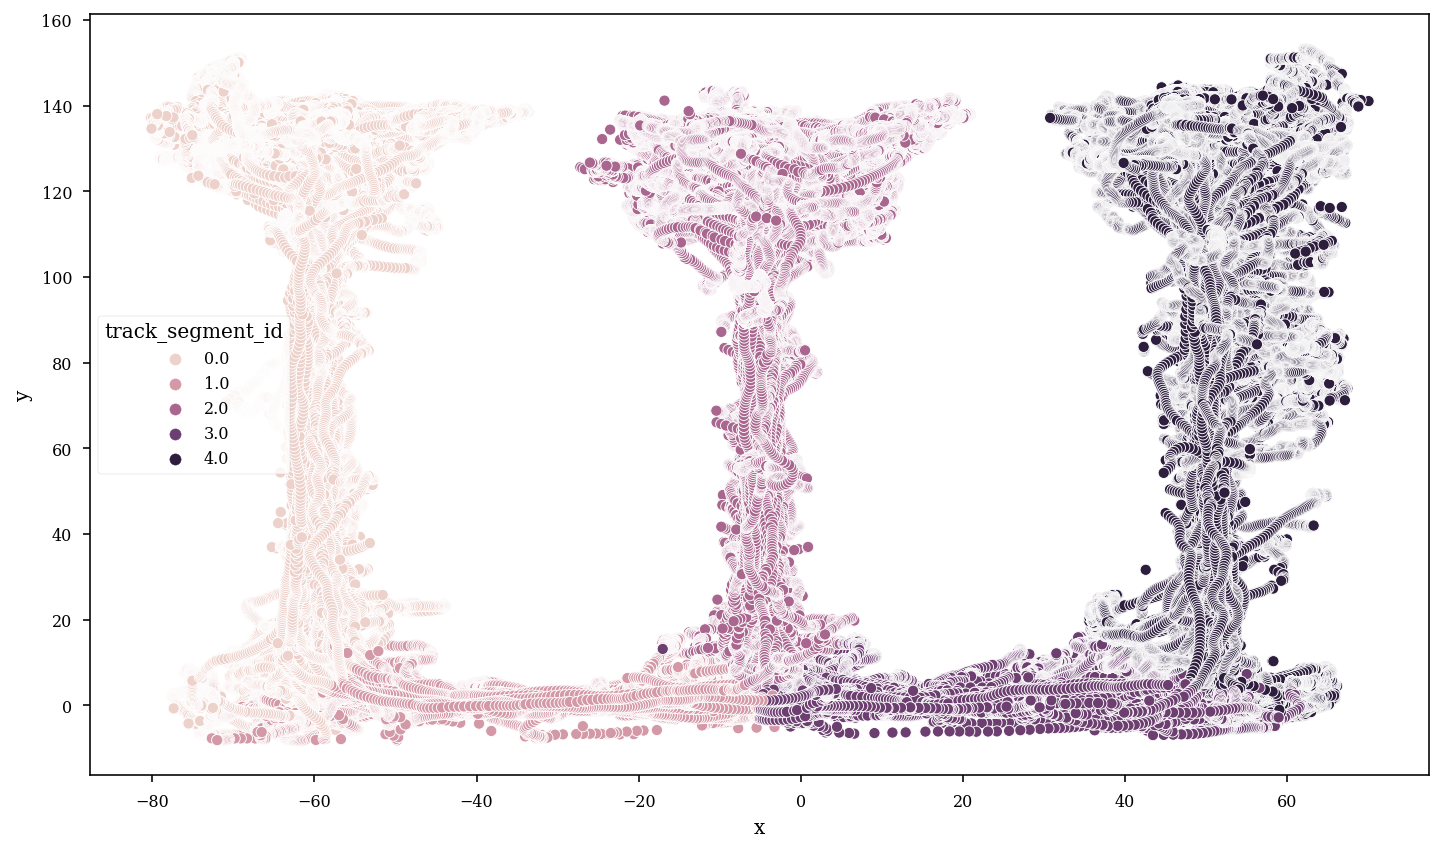

In [49]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x="x", y="y",hue="track_segment_id", data=behave_df,ax=plt.gca())
plt.show()

In [49]:
from sklearn.manifold import Isomap
sample_sec=3
imap = Isomap(n_neighbors=10, n_components=2)
# downsample points to reduce memory load and time
xy_pos = behave_df[["x","y"]].values
xy_pos = xy_pos[~np.isnan(xy_pos).any(axis=1)]
pos_ds = xy_pos[0 : -1 : np.round(int(fs) * sample_sec)]
imap.fit(pos_ds)

iso_pos = imap.transform(xy_pos)
# Keep iso_pos here in case we want to use 2nd dimension (transverse to track) in future...
# if iso_pos.std(axis=0)[0] < iso_pos.std(axis=0)[1]:
#     iso_pos[:, [0, 1]] = iso_pos[:, [1, 0]]
xlinear = iso_pos[:, 0]

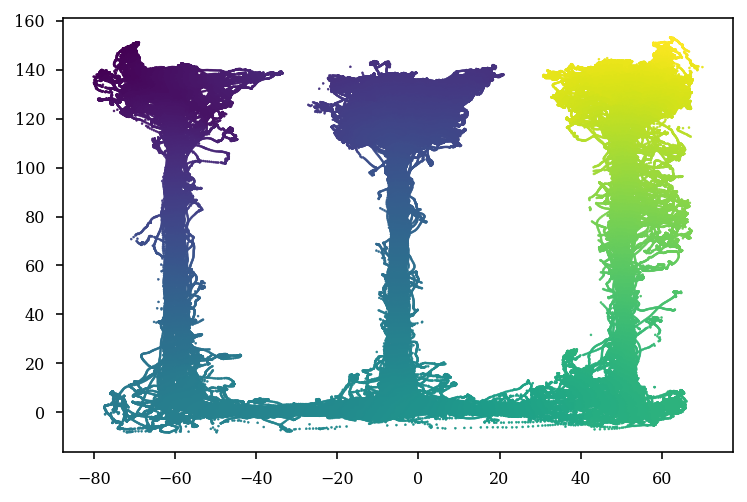

In [50]:
plt.scatter(xy_pos[:, 0], xy_pos[:, 1], c=xlinear, s=1)

In [ ]:
from sklearn.manifold import Isomap
behave_df = loading.load_animal_behavior(r"Z:\Data\ORproject\OR15\day1")

plt.plot(behave_df.x, behave_df.y)
plt.axis("equal")

X = behave_df[["x","y"]].values
X = X[~np.isnan(X).any(axis=1)]
embedding = Isomap(n_components=1)

X_transformed = embedding.fit_transform(X.T)

In [25]:
behave_df[["x","y"]].values

array([[nan, nan],
       [nan, nan],
       [nan, nan],
       ...,
       [nan, nan],
       [nan, nan],
       [nan, nan]])

In [110]:
df = pd.read_csv(r"Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv", index_col=0)
df = df[df.basepath.str.contains("ORproject")]
df

,basepath,basename
Var1,,
212,Z:\Data\ORproject\OR15\day1,day1
213,Z:\Data\ORproject\OR15\day10,day10
214,Z:\Data\ORproject\OR15\day2,day2
215,Z:\Data\ORproject\OR15\day3,day3
216,Z:\Data\ORproject\OR15\day4,day4
217,Z:\Data\ORproject\OR18\day1,day1
218,Z:\Data\ORproject\OR18\day2,day2
219,Z:\Data\ORproject\OR18\day3,day3
220,Z:\Data\ORproject\OR21\day2,day2


In [14]:
behave_df = loading.load_animal_behavior("Z:\Data\ORproject\OR23\day5")
behave_df.epochs.value_counts()

OR23day5_1_180503_115514    214341
OR23day5_2_180503_201828    202590
Name: epochs, dtype: int64

In [154]:
data['behavior']['epochs']

[{'name': 'OR23day5_preSleep_180503_093616',
  'startTime': 0,
  'stopTime': 8016.588766666667,
  'environment': 'sleep'},
 {'name': 'OR23day5_1_180503_115514',
  'startTime': 8016.5888,
  'stopTime': 9817.463433333332,
  'environment': 'wmaze'},
 {'name': 'OR23day5_2_180503_201828',
  'startTime': 9817.463466666666,
  'stopTime': 11523.754633333334,
  'environment': 'wmaze'}]

In [162]:
for ep in data['behavior']['epochs']:
    print(ep['environment'])

sleep
wmaze
wmaze


In [193]:
data['behavior']['epochs']

[{'name': 'OR23day5_preSleep_180503_093616',
  'startTime': 0,
  'stopTime': 8016.588766666667,
  'environment': 'sleep'},
 {'name': 'OR23day5_1_180503_115514',
  'startTime': 8016.5888,
  'stopTime': 9817.463433333332,
  'environment': 'wmaze'},
 {'name': 'OR23day5_2_180503_201828',
  'startTime': 9817.463466666666,
  'stopTime': 11523.754633333334,
  'environment': 'wmaze'}]

In [43]:
import scipy.io as sio
import glob

def load_animal_behavior(basepath):
    """
    load_animal_behavior loads basename.animal.behavior.mat files created by general_behavior_file.m
    The output is a pandas data frame with [time,x,y,z,linerized,speed,acceleration,trials,epochs]

    Ryan H 2021
    """
    try:
        filename = glob.glob(os.path.join(basepath,'*.animal.behavior.mat'))[0]
    except:
        warnings.warn("file does not exist")
        return 

    data = []
    data = sio.loadmat(filename, simplify_cells=True)

    df = pd.DataFrame()
    # add timestamps first which provide the correct shape of df
    # here, I'm naming them time, but this should be depreciated
    df['time'] = data['behavior']['timestamps']

    # add all other position coordinates to df (will add everything it can within position)
    for key in data['behavior']["position"].keys():
        try:
            df[key] = data['behavior']["position"][key]
        except:
            pass
    # add other fields from behavior to df (acceleration,speed,states)
    for key in data['behavior'].keys():
        try:
            df[key] = data['behavior'][key]
        except:
            pass
    # add speed and acceleration 
    if "speed" not in df.columns:
        df["speed"] = functions.get_speed(df[["x","y"]].values, df.time.values)
    if "acceleration" not in df.columns:
        df.loc[1:,"acceleration"] = np.diff(df["speed"])

    trials = data['behavior']['trials']
    for t in range(trials.shape[0]):
        idx = (df.time >= trials[t,0]) & (df.time <= trials[t,1])
        df.loc[idx,'trials'] = t

    epochs = loading.load_epoch(basepath)
    for t in range(epochs.shape[0]):
        idx = (df.time >= epochs.startTime.iloc[t]) & (df.time <= epochs.stopTime.iloc[t])
        df.loc[idx,'epochs'] = epochs.name.iloc[t] 
        df.loc[idx,'environment'] = epochs.environment.iloc[t] 
    return df

df = pd.read_csv(r"Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv", index_col=0)
# df = df[df.basepath.str.contains("ORproject")]
for basepath in df.basepath:
    behav_df = loading.load_animal_behavior(basepath)
    if behav_df is None:
        print(basepath, "no behavior file")
        continue
    if not set(["x","y","time"]).issubset(behav_df.columns):
        print(basepath, "missing columns")
# for basepath in df.basepath:
#     print(basepath)
#     behav_df = load_animal_behavior(basepath)
#     plt.plot(behav_df.x, behav_df.y)
#     plt.title(np.abs(np.nanstd((np.diff(np.sqrt(behav_df.x**2 + behav_df.y**2)))))*20)

#     plt.show()
    # print(np.abs(np.nanstd((np.diff(np.sqrt(behav_df.x**2 + behav_df.y**2)))))*20)


Z:\Data\AYAold\AB1\day1 missing columns


d:\github\ripple_heterogeneity\ripple_heterogeneity\utils\loading.py:660: UserWarning: file does not exist


Z:\Data\ORproject\OR15\hc280118 no behavior file
Z:\Data\ORproject\OR15\hc300118 no behavior file


In [42]:
behav_df is None

True

In [26]:
filename = glob.glob(os.path.join("Z:\\Data\\ORproject\\OR15\\day1",'*.animal.behavior.mat'))[0]
data = sio.loadmat(filename, simplify_cells=True)

df = pd.DataFrame()
df['time'] = data['behavior']['timestamps']
for key in data['behavior']["position"].keys():
    try:
        df[key] = data['behavior']["position"][key]
    except:
        pass

df

,time,x,y,z,linearized,units,projected_x,projected_y
0,2.79925,NaN,NaN,19.3239,NaN,cm,NaN,NaN
1,2.80755,NaN,NaN,19.3147,NaN,cm,NaN,NaN
2,2.81590,NaN,NaN,19.3118,NaN,cm,NaN,NaN
3,2.82425,NaN,NaN,19.2998,NaN,cm,NaN,NaN
4,2.83255,NaN,NaN,19.2957,NaN,cm,NaN,NaN
...,...,...,...,...,...,...,...,...
455392,9890.38545,NaN,NaN,NaN,NaN,cm,NaN,NaN
455393,9890.39375,NaN,NaN,NaN,NaN,cm,NaN,NaN
455394,9890.40210,NaN,NaN,NaN,NaN,cm,NaN,NaN
455395,9890.41045,NaN,NaN,NaN,NaN,cm,NaN,NaN


In [18]:
behav_df = load_animal_behavior("Z:\\Data\\ORproject\\OR15\\day1")

behav_df.x.diff()

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
455392   NaN
455393   NaN
455394   NaN
455395   NaN
455396   NaN
Name: x, Length: 455397, dtype: float64

In [19]:
behav_df.x.diff()

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
455392   NaN
455393   NaN
455394   NaN
455395   NaN
455396   NaN
Name: x, Length: 455397, dtype: float64

In [11]:
# behav_df = load_animal_behavior(basepath)
import glob
filename = glob.glob(os.path.join(basepath,'*.animal.behavior.mat'))[0]
filename


'Z:\\Data\\ORproject\\OR15\\day1\\day1.animal.behavior.mat'

In [214]:
loading.load_epoch(basepath)

,name,startTime,stopTime,environment,manipulation
0,OML18day2_preSleep_190919_091920,0.000000,14938.079967,sleep,none
1,OML18day2_linear_190919_134949,14938.080000,17808.693300,linear,mec_silencing
2,OML18day2_postSleep_190919_145936,17808.693333,28646.265567,sleep,none


In [213]:
basepath = r"Z:\Data\OMLproject\OML18\day2"
filename = glob.glob(os.path.join(basepath,'*.animal.behavior.mat'))[0]

data = sio.loadmat(filename, simplify_cells=True)
# data = sio.loadmat(filename)
print(filename)
data['behavior']['epochs']

# load_animal_behavior(basepath)

Z:\Data\OMLproject\OML18\day2\day2.animal.behavior.mat


[{'name': 'OML18day2_preSleep_190919_091920',
  'startTime': 0,
  'stopTime': 14938.079966666666},
 {'name': 'OML18day2_linear_190919_134949',
  'startTime': 14938.08,
  'stopTime': 17808.6933},
 {'name': 'OML18day2_postSleep_190919_145936',
  'startTime': 17808.693333333333,
  'stopTime': 28646.265566666665}]

In [196]:
basepath = r"Z:\Data\OMLproject\OML18\day2"

loading.load_animal_behavior(basepath)

,time,x,y,z,linearized,speed,acceleration,trials,epochs
0,14978.430000,1.0,1.0,NaN,0.055447,0.0,0.0,0.0,OML18day2_linear_190919_134949
1,14978.438333,1.0,1.0,NaN,0.055447,0.0,0.0,0.0,OML18day2_linear_190919_134949
2,14978.446667,1.0,1.0,NaN,0.055447,0.0,0.0,0.0,OML18day2_linear_190919_134949
3,14978.455000,1.0,1.0,NaN,0.055447,0.0,0.0,0.0,OML18day2_linear_190919_134949
4,14978.463333,1.0,1.0,NaN,0.055447,0.0,0.0,0.0,OML18day2_linear_190919_134949
...,...,...,...,...,...,...,...,...,...
339626,17808.646667,NaN,NaN,NaN,NaN,NaN,NaN,127.0,OML18day2_linear_190919_134949
339627,17808.655000,NaN,NaN,NaN,NaN,NaN,NaN,127.0,OML18day2_linear_190919_134949
339628,17808.663333,NaN,NaN,NaN,NaN,NaN,NaN,127.0,OML18day2_linear_190919_134949
339629,17808.671667,NaN,NaN,NaN,NaN,NaN,NaN,127.0,OML18day2_linear_190919_134949


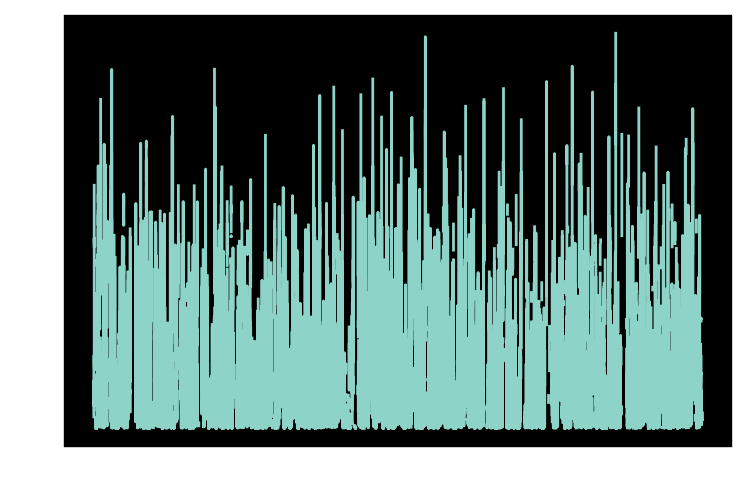

In [147]:
def get_velocity(position, time=None):
    if time is None:
        time = np.arange(position.shape[0])
    return np.gradient(position, time, axis=0)

def get_speed(position, time=None):
    velocity = get_velocity(position, time=time)
    return np.sqrt(np.sum(velocity ** 2, axis=1))
    
speed = get_speed(df[["x","y"]].values, df.time.values)
plt.plot(speed)


In [143]:
velocity = get_velocity(df[["x","y"]].values, df.time.values)


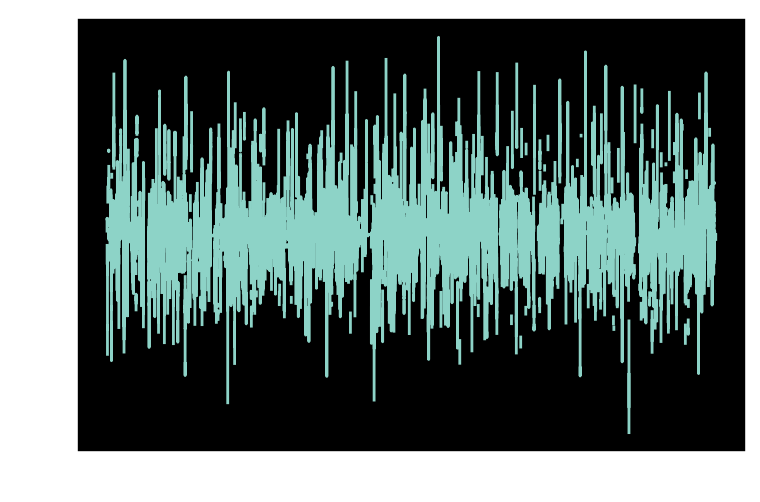

In [145]:
plt.plot(velocity[:,1])

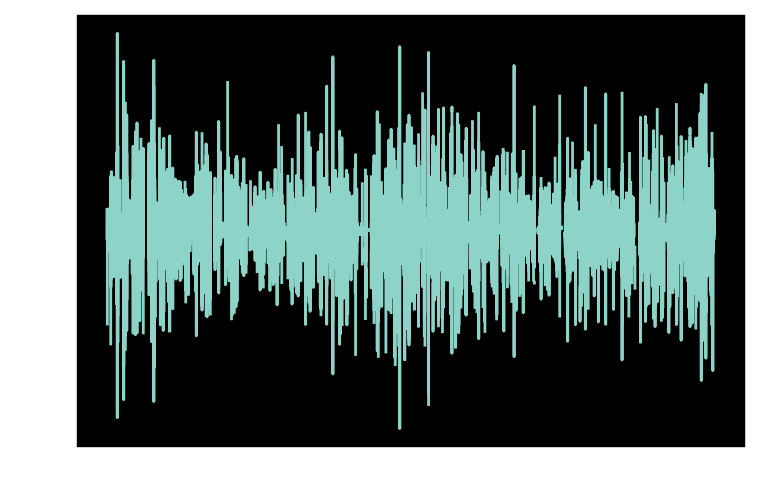

In [142]:
plt.plot(np.diff(speed))

In [117]:
data['behavior'].keys()

dict_keys(['sr', 'position', 'speed', 'acceleration', 'trials', 'notes', 'epochs', 'processinginfo', 'timestamps', 'states', 'stateNames'])

AttributeError: 'DataFrame' object has no attribute 'projected_x'

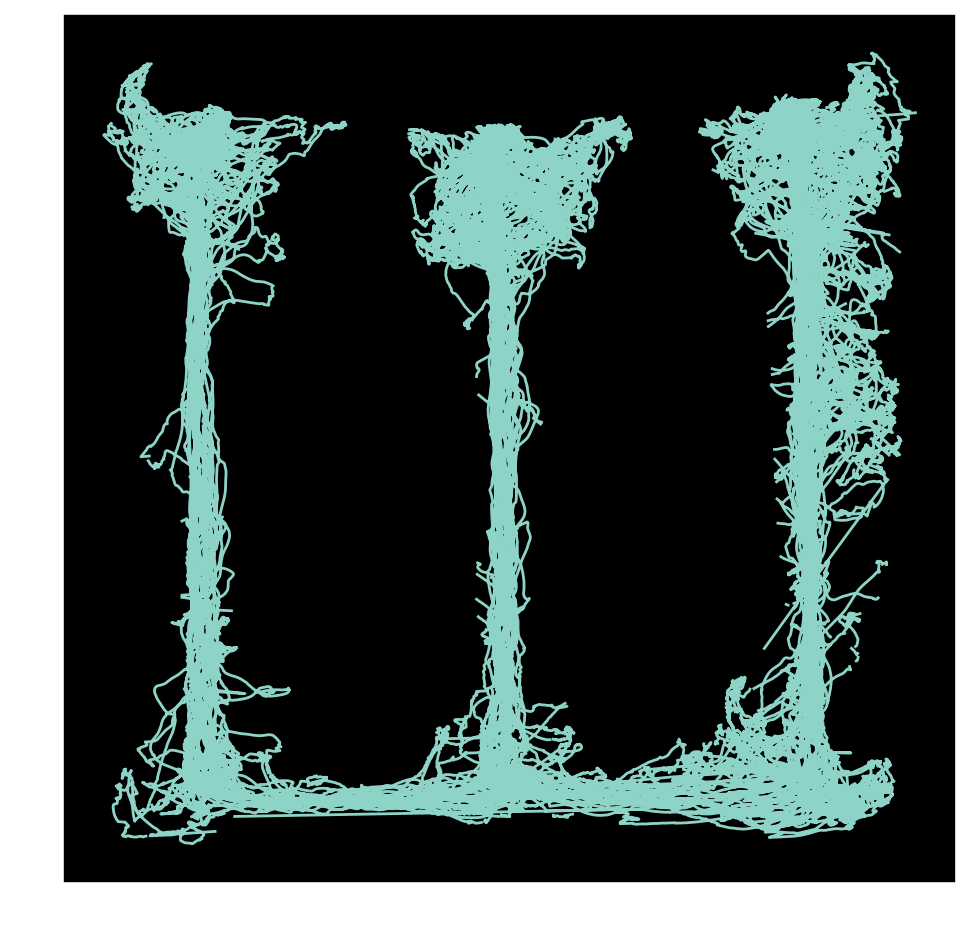

In [111]:
for basepath in df.basepath:
    behave_df = loading.load_animal_behavior(basepath)
    if behave_df is None:
        continue
    plt.figure(figsize=(8,8))
    for epochs_i, epochs in enumerate(behave_df.epochs.unique()):
        plt.plot(behave_df[behave_df.epochs==epochs].x + epochs_i*150,behave_df[behave_df.epochs==epochs].y)
        plt.plot(behave_df[behave_df.epochs==epochs].projected_x + epochs_i*150,behave_df[behave_df.epochs==epochs].projected_y)

    plt.axis('equal')
    plt.title(basepath)
    plt.show()